In [49]:
import csv
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.api import OLS
import statsmodels.formula.api as smf





In [50]:
data_not_clean = pd.read_csv("Chronic_kidney.csv") # upload data set




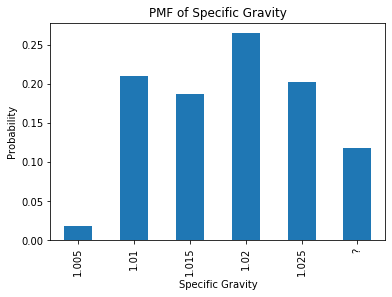

In [51]:
# PMF specific gravity prior to data cleaning

sg =  data_not_clean['Specific Gravity']
pmf = sg.value_counts().sort_index() / len(sg)
plt.xlabel('Specific Gravity')
plt.ylabel('Probability')
plt.title('PMF of Specific Gravity')
pmf.plot(kind='bar')

In [52]:
new_notClean_data = data_not_clean[['Specific Gravity', 'Albumin','Hemoglobin', 'Blood Pressure', 'Red Blood Cell count', 'Diagnosis']]





In [53]:
#starting the cleaning process
new_data = new_notClean_data.replace('?', '')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
Specific Gravity        400 non-null object
Albumin                 400 non-null object
Hemoglobin              400 non-null object
Blood Pressure          400 non-null object
Red Blood Cell count    400 non-null object
Diagnosis               400 non-null object
dtypes: object(6)
memory usage: 18.9+ KB


In [54]:

new_data=new_data.dropna(axis=0)    
duplicate_rows = new_data[new_data.duplicated()]
print("number of duplicate rows:", duplicate_rows.shape)





number of duplicate rows: (20, 6)


In [55]:
print(new_data.isnull().sum()) # just ensuring no null or missing values.


Specific Gravity        0
Albumin                 0
Hemoglobin              0
Blood Pressure          0
Red Blood Cell count    0
Diagnosis               0
dtype: int64


In [56]:
# changing string characters into numerical values
dictionary = {'Diagnosis':{'ckd': 1, 'notckd': 0}}
new_data=new_data.replace(dictionary)



In [57]:
# changing values from object to float                                                                     
new_data['Specific Gravity'] = pd.to_numeric(new_data['Specific Gravity'],errors='coerce')
new_data['Albumin'] = pd.to_numeric(new_data['Albumin'],errors='coerce')
new_data['Hemoglobin'] = pd.to_numeric(new_data['Hemoglobin'],errors='coerce')
new_data['Blood Pressure'] = pd.to_numeric(new_data['Blood Pressure'],errors='coerce')
new_data['Red Blood Cell count'] = pd.to_numeric(new_data['Red Blood Cell count'],errors='coerce')
new_data['Diagnosis'] = pd.to_numeric(new_data['Diagnosis'],errors='coerce')


In [58]:
new_data=new_data.dropna()     # doing some final touchs on data cleaning ensuring no duplicates
new_data.drop_duplicates(keep=False, inplace=True)
duplicate_rows = new_data[new_data.duplicated()]
print("number of duplicate rows:", duplicate_rows.shape)



number of duplicate rows: (0, 6)


In [59]:
new_data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 399
Data columns (total 6 columns):
Specific Gravity        233 non-null float64
Albumin                 233 non-null float64
Hemoglobin              233 non-null float64
Blood Pressure          233 non-null float64
Red Blood Cell count    233 non-null float64
Diagnosis               233 non-null int64
dtypes: float64(5), int64(1)
memory usage: 12.7 KB


In [60]:
new_data.describe()  # some descriptive analysis

,Specific Gravity,Albumin,Hemoglobin,Blood Pressure,Red Blood Cell count,Diagnosis
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,1.018584,0.854077,13.185408,75.493562,4.749785,0.446352
std,0.005736,1.375648,2.877102,11.738575,1.004049,0.498184
min,1.005000,0.000000,3.100000,50.000000,2.100000,0.000000
25%,1.015000,0.000000,11.100000,70.000000,4.000000,0.000000
50%,1.020000,0.000000,13.700000,80.000000,4.800000,0.000000
75%,1.025000,2.000000,15.400000,80.000000,5.500000,1.000000
max,1.025000,5.000000,17.800000,110.000000,8.000000,1.000000


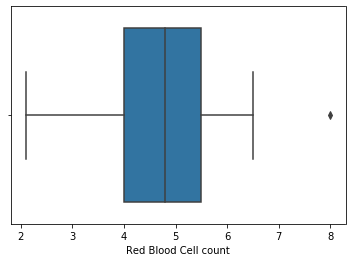

In [61]:
sns.boxplot(new_data['Red Blood Cell count'])        # boxplot RBC

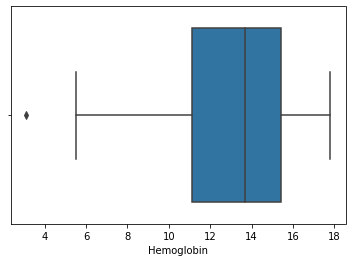

In [62]:
sns.boxplot(new_data['Hemoglobin'])    # boxplot hemoglobin


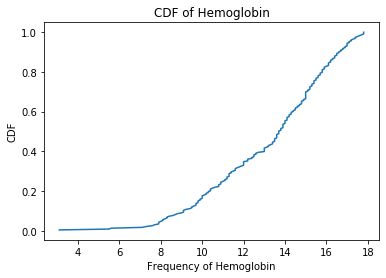

In [63]:
hemoglobin= new_data['Hemoglobin']
def cdf(hemoglobin):  # creating cdf function
    n = len(hemoglobin)  # count
    x = np.sort(hemoglobin) # sorting the data
    y = np.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

x_data, y_data = cdf(hemoglobin)          # plotting the CDF 
plt.xlabel('Frequency of Hemoglobin')
plt.ylabel('CDF')
plt.title('CDF of Hemoglobin')
plt.plot(x_data, y_data) 

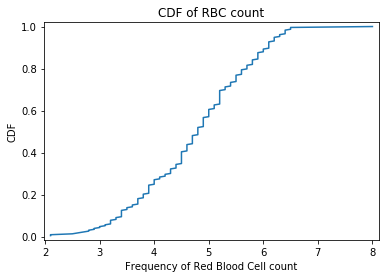

In [64]:
rbc= new_data['Red Blood Cell count']
def cdf(rbc):  # creating cdf function
    n = len(rbc)  # count
    x = np.sort(rbc) # sorting the data
    y = np.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

x_data, y_data = cdf(rbc)          # plotting the CDF 
plt.xlabel('Frequency of Red Blood Cell count')
plt.ylabel('CDF')
plt.title('CDF of RBC count')
plt.margins(0.02)
plt.plot(x_data, y_data) 

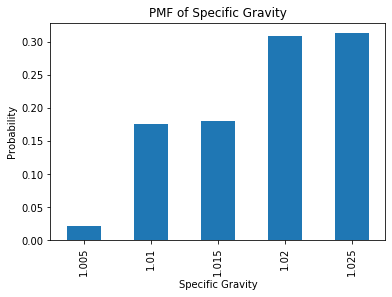

In [65]:
# Post data clean PMF specific gravity
sg =  new_data['Specific Gravity']
pmf = sg.value_counts().sort_index() / len(sg)
plt.xlabel('Specific Gravity')
plt.ylabel('Probability')
plt.title('PMF of Specific Gravity')
pmf.plot(kind='bar')

In [66]:
new_data.corr()  # Correlation


,Specific Gravity,Albumin,Hemoglobin,Blood Pressure,Red Blood Cell count,Diagnosis
Specific Gravity,1.000000,-0.561656,0.652512,-0.296861,0.579624,-0.773386
Albumin,-0.561656,1.000000,-0.693287,0.282081,-0.579846,0.692950
Hemoglobin,0.652512,-0.693287,1.000000,-0.325872,0.787477,-0.796864
Blood Pressure,-0.296861,0.282081,-0.325872,1.000000,-0.261385,0.411777
Red Blood Cell count,0.579624,-0.579846,0.787477,-0.261385,1.000000,-0.696941
Diagnosis,-0.773386,0.692950,-0.796864,0.411777,-0.696941,1.000000


In [67]:
new_data.cov()  # Covariance

,Specific Gravity,Albumin,Hemoglobin,Blood Pressure,Red Blood Cell count,Diagnosis
Specific Gravity,0.000033,-0.004432,0.010768,-0.019988,0.003338,-0.002210
Albumin,-0.004432,1.892408,-2.743949,4.555091,-0.800894,0.474896
Hemoglobin,0.010768,-2.743949,8.277717,-11.005698,2.274824,-1.142166
Blood Pressure,-0.019988,4.555091,-11.005698,137.794139,-3.080713,2.408058
Red Blood Cell count,0.003338,-0.800894,2.274824,-3.080713,1.008114,-0.348611
Diagnosis,-0.002210,0.474896,-1.142166,2.408058,-0.348611,0.248187


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

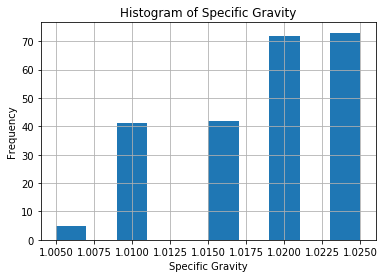

In [68]:
# Histogram Specific Gravity
sg = new_data['Specific Gravity']
sg.hist()
plt.title('Histogram of Specific Gravity')
plt.xlabel('Specific Gravity')
plt.ylabel('Frequency')
plt.plot


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

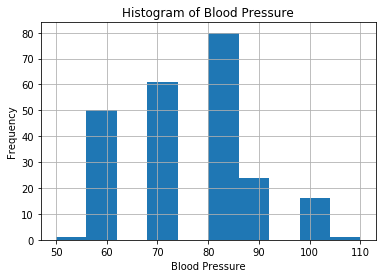

In [69]:
# Histogram Blood Pressure
bp = new_data['Blood Pressure']
bp.hist()
plt.title('Histogram of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.plot


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

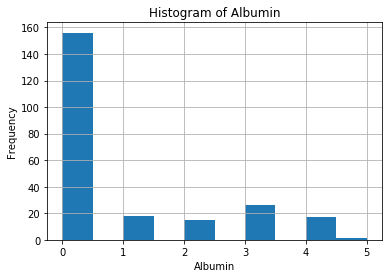

In [70]:
# Histogram Albumin
alb = new_data['Albumin']
alb.hist()
plt.title('Histogram of Albumin')
plt.xlabel('Albumin')
plt.ylabel('Frequency')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

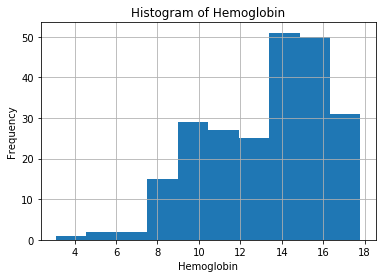

In [71]:
# Histogram of Hemoglobin
hgb = new_data['Hemoglobin']
hgb.hist()
plt.title('Histogram of Hemoglobin')
plt.xlabel('Hemoglobin')
plt.ylabel('Frequency')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

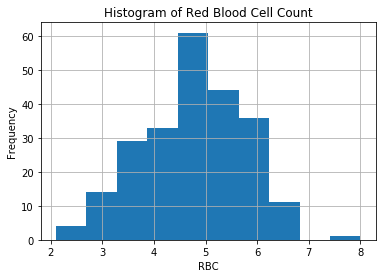

In [72]:
#Histogram of RBC count
rbc = new_data['Red Blood Cell count']
rbc.hist()
plt.title('Histogram of Red Blood Cell Count')
plt.xlabel('RBC')
plt.ylabel('Frequency')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

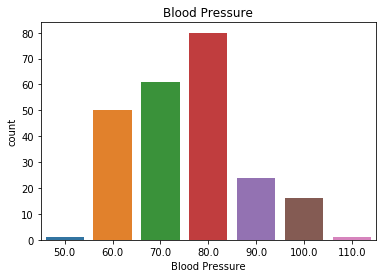

In [73]:
sns.countplot(new_data['Blood Pressure'])  # Graph of patients Blood Pressure
plt.title('Blood Pressure')
plt.plot

Text(0.5, 1.0, 'Chronic Kidney disease vs. No disease count')

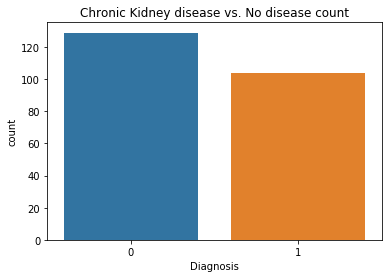

In [74]:
sns.countplot(new_data['Diagnosis'])# Graph of patient with kidney disease(ckd) vs no kidney disease(nockd)
plt.title('Chronic Kidney disease vs. No disease count')

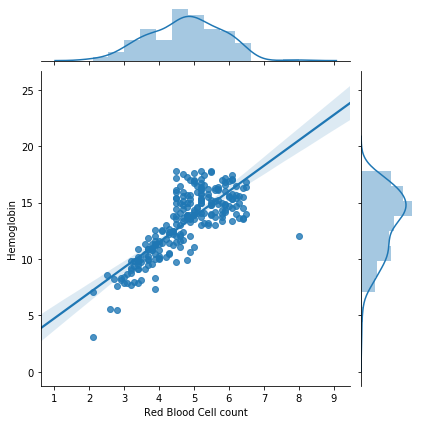

In [75]:
# viewing distribution and scatterplot amoung RBC and Hemoglobin
sns.jointplot(x= 'Red Blood Cell count', y= 'Hemoglobin', data= new_data, kind= 'reg')

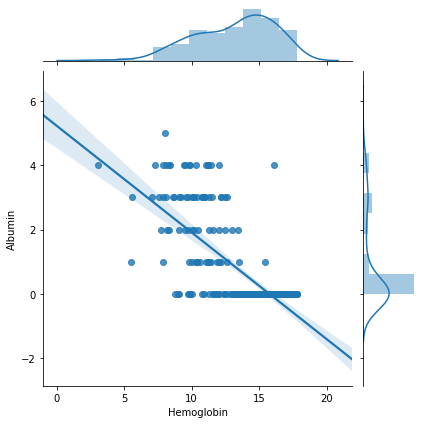

In [76]:
sns.jointplot(x= 'Hemoglobin', y= 'Albumin', data= new_data, kind= 'reg') #jointplot hgb and albumin

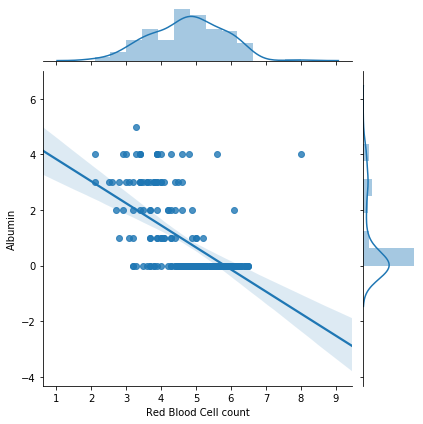

In [77]:
sns.jointplot(x= 'Red Blood Cell count', y= 'Albumin', data= new_data, kind= 'reg') #jointplot rbc and albumin

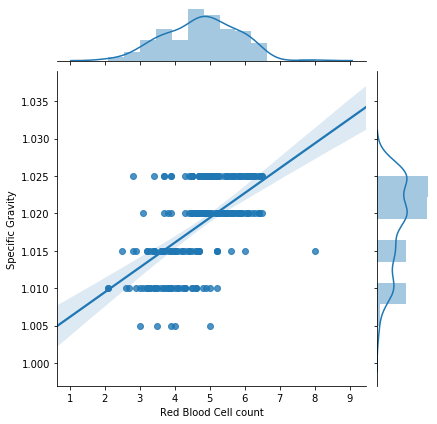

In [78]:
sns.jointplot(x= 'Red Blood Cell count', y= 'Specific Gravity', data= new_data, kind= 'reg') # jointplot rbc and sg

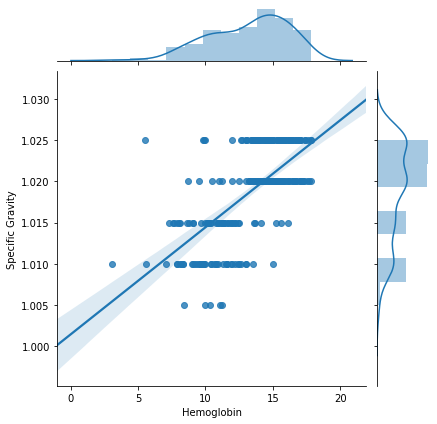

In [79]:
sns.jointplot(x= 'Hemoglobin', y= 'Specific Gravity', data= new_data, kind= 'reg') # jointplot hgb and sg

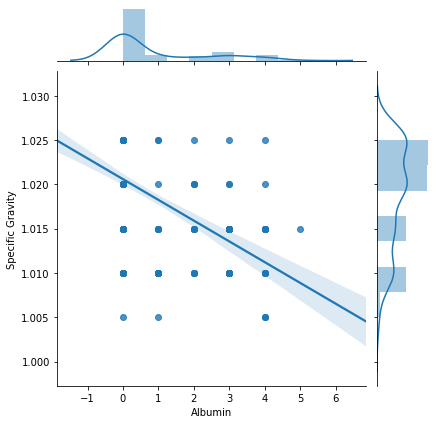

In [80]:
sns.jointplot(x= 'Albumin', y= 'Specific Gravity', data= new_data, kind= 'reg')  # jointplot alb and sg

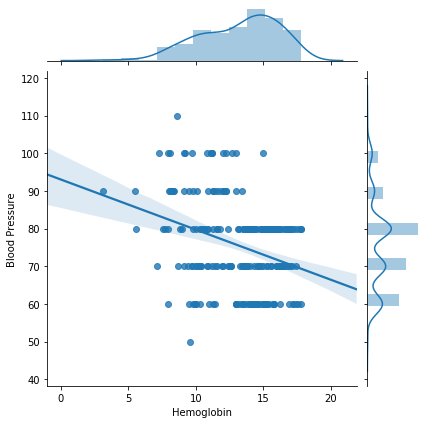

In [81]:
sns.jointplot(x= 'Hemoglobin', y= 'Blood Pressure', data= new_data, kind= 'reg')  # jointplot hgb and bp

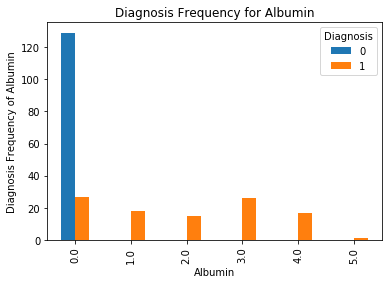

In [82]:
pd.crosstab(new_data['Albumin'],new_data['Diagnosis']).plot(kind='bar') # cross tab albumin and diagnosis
plt.title('Diagnosis Frequency for Albumin')
plt.xlabel('Albumin')
plt.ylabel('Diagnosis Frequency of Albumin')
plt.savefig('pur_fre_pout_bar')

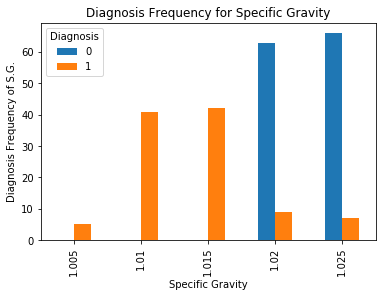

In [83]:
pd.crosstab(new_data['Specific Gravity'],new_data['Diagnosis']).plot(kind='bar') #cross tab sg and diagnosis
plt.title('Diagnosis Frequency for Specific Gravity')
plt.xlabel('Specific Gravity')
plt.ylabel('Diagnosis Frequency of S.G.')
plt.savefig('pur_fre_pout_bar')

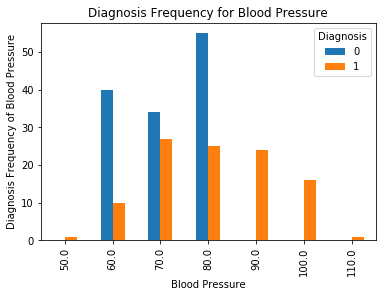

In [84]:
pd.crosstab(new_data['Blood Pressure'],new_data['Diagnosis']).plot(kind='bar')  #cross tab bp and diagnosis
plt.title('Diagnosis Frequency for Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Diagnosis Frequency of Blood Pressure')
plt.savefig('pur_fre_pout_bar')

Text(0.5, 1.0, 'Distribution of Red Blood Cell count')

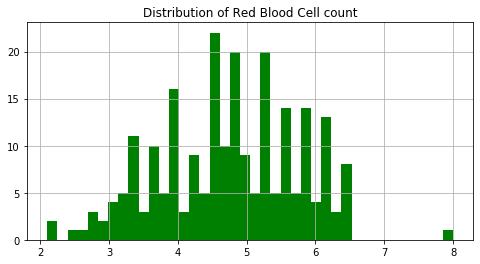

In [85]:
new_data['Red Blood Cell count'].hist(color='green',bins=40,figsize=(8,4))  # Distribution of RBC count
plt.title('Distribution of Red Blood Cell count')

Text(0.5, 1.0, 'Distribution of Hemoglobin')

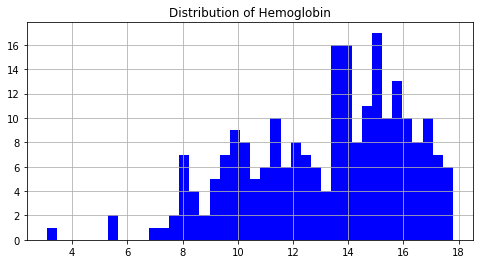

In [86]:
new_data['Hemoglobin'].hist(color='blue',bins=40,figsize=(8,4)) # Distribution of Hemoglobin
plt.title('Distribution of Hemoglobin')

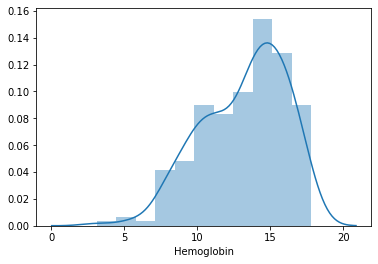

In [87]:
sns.distplot(new_data['Hemoglobin'])  # Distribution of Hemoglobin

Text(0.5, 1.0, 'Boxplot of patients Diagnosis in relation to Hemoglobin')

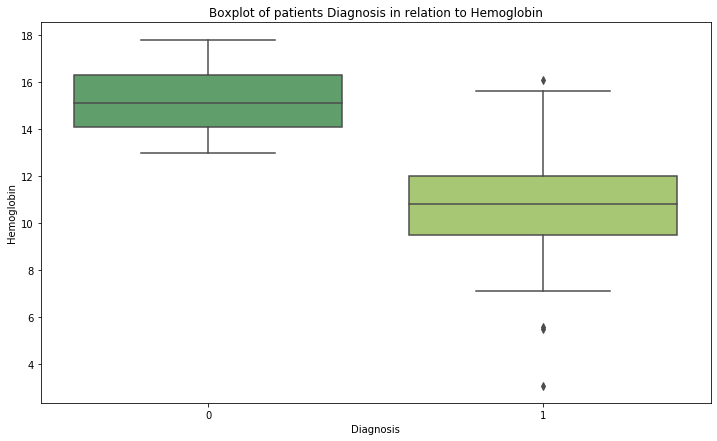

In [88]:
# Boxplot of diagnosis in relation to hemoglobin
plt.figure(figsize=(12, 7))                    
sns.boxplot(x='Diagnosis',y='Hemoglobin',data=new_data,palette='summer')
plt.title('Boxplot of patients Diagnosis in relation to Hemoglobin')

Text(0.5, 1.0, 'Boxplot of patients Diagnosis in relation to RBC')

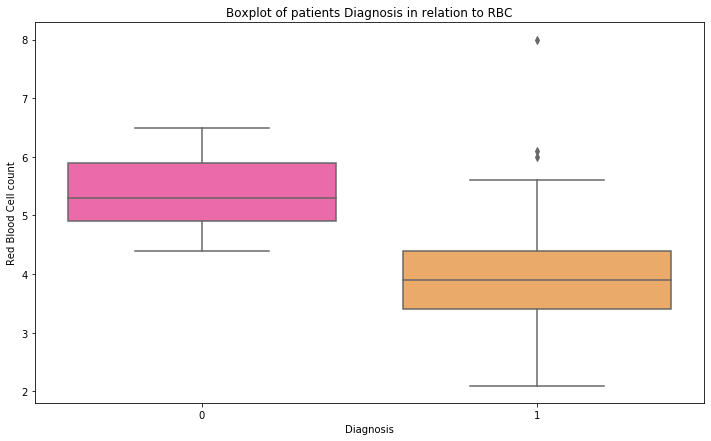

In [89]:
# Boxplot of diagnosis in relation to rbc
plt.figure(figsize=(12, 7))                    
sns.boxplot(x='Diagnosis',y='Red Blood Cell count',data=new_data,palette='spring')
plt.title('Boxplot of patients Diagnosis in relation to RBC')

In [90]:
SG= new_data['Specific Gravity']                              # renaming variables for regression analsysis
Albumin= new_data['Albumin']
Hemoglobin= new_data['Hemoglobin']
RBC= new_data['Red Blood Cell count']
BP= new_data['Blood Pressure']
Diagnosis= new_data['Diagnosis']

In [91]:
formula= 'Diagnosis ~  SG + Albumin + Hemoglobin + RBC + BP'  # logistic regression analysis
model = smf.logit(formula, data= new_data)
results = model.fit()
results.summary()

         Current function value: 0.024453
         Iterations: 35


C:\Users\EF\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  233
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.9644
Time:                        10:54:07   Log-Likelihood:                -5.6975
converged:                      False   LL-Null:                       -160.16
Covariance Type:            nonrobust   LLR p-value:                 1.207e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2548.2848   1532.923      1.662      0.096    -456.189    5552.758
SG         -2452.5303   1478.920     -1.658      0.097   -5351.160     446.100
Albumin       24.0014   3205.779      0.007      0.994   -6259.210    6307.212
Hemoglobin    -4.0534      2.263     -1.791      0.073      -8.489       0.382
RBC           -3.1356      2.537     -1.236      0.216      -8.108       1.837
BP             0.3021      0.184      1.639      0.101      -0.059       0.663
==============================================================================

Possibly complete quasi-separation: A fraction 0.87 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""